<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Data_Pre_processing_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling missing data

![](https://i.imgur.com/hzjuePZ.png)

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://assets.datacamp.com/production/repositories/4983/datasets/db66797c50f6938065374e9a31353053fb542052/LoansTrainingSetReduced.csv"
loan_data = pd.read_csv(url)

# Print missing values
print(loan_data.isna().sum())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64


In [2]:
# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

34.347092565515695


In [3]:
# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

70.58823529411765


In [4]:
# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

count    67572.000000
mean       721.601951
std         27.427709
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64
count    88910.000000
mean       548.420729
std        309.109970
min          0.000000
25%        632.000000
50%        719.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64


In [5]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

In [6]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

# Data distributions and transformations

![123](https://i.imgur.com/X7s8mjZ.png)

<Figure size 432x288 with 0 Axes>

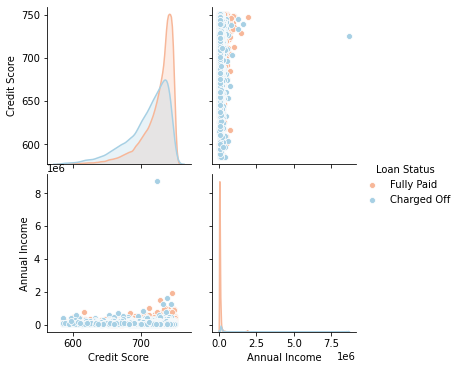

<Figure size 432x288 with 0 Axes>

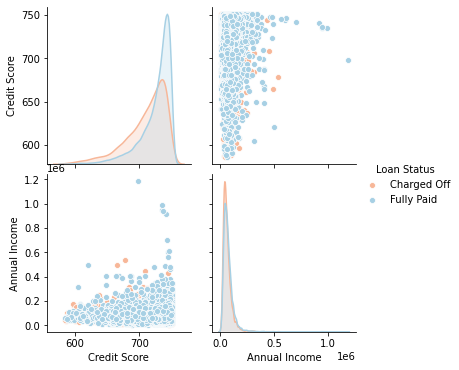

In [7]:
from sklearn.model_selection import train_test_split
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

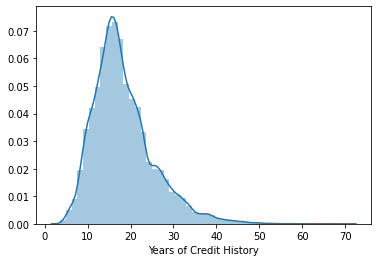

In [8]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs)
plt.show()

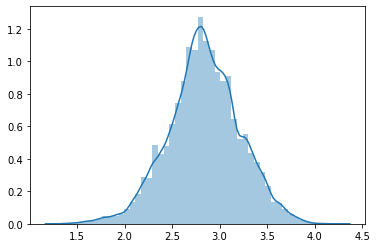

In [9]:
from scipy.stats import boxcox
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

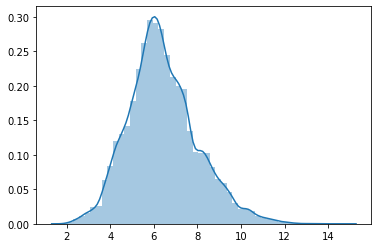

In [10]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_sqrt)
plt.show()

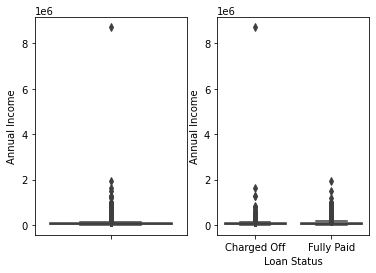

In [11]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

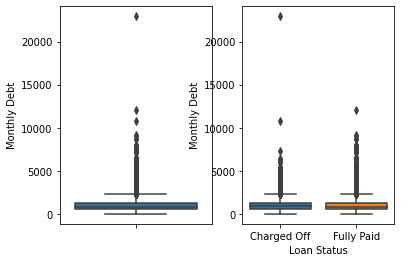

In [12]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()

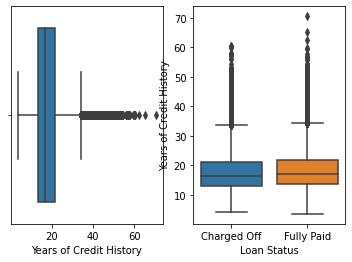

In [13]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

In [14]:
from scipy import stats
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])
# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

Current Loan Amount             1.433878e+07
Credit Score                    7.216020e+02
Years in current job            5.721263e+00
Annual Income                   7.234575e+04
Monthly Debt                    9.631021e+02
Years of Credit History         1.831531e+01
Months since last delinquent    3.508029e+01
Number of Open Accounts         1.111035e+01
Number of Credit Problems       1.604769e-01
Current Credit Balance          1.543593e+04
Maximum Open Credit             3.356812e+04
Bankruptcies                    1.126716e-01
Tax Liens                       2.822209e-02
dtype: float64
Current Loan Amount             14355.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Problems           0.000
Current Credit Balance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [15]:
# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = stats.mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

963.1020592734293
843.925
22939.12
Monthly Debt    935.371257
dtype: float64
Monthly Debt    843.925
dtype: float64
Monthly Debt    2115.52
dtype: float64


In [16]:
# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

963.1020592734293
843.925
22939.12
866.8290722078564
811.51
2119.72


In [17]:
from sklearn.preprocessing import StandardScaler
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())

   Current Loan Amount  Credit Score  ...  Home Ownership            Purpose
0            -0.408982      0.233271  ...            Rent  DebtConsolidation
1            -0.408617      0.415570  ...        Mortgage  DebtConsolidation
2            -0.408871      0.087432  ...        Mortgage   HomeImprovements
3            -0.408997      0.670788  ...            Rent  DebtConsolidation
4            -0.409052     -1.298038  ...        Mortgage   HomeImprovements

[5 rows x 17 columns]
